24_25 Erik Santana Montelongo


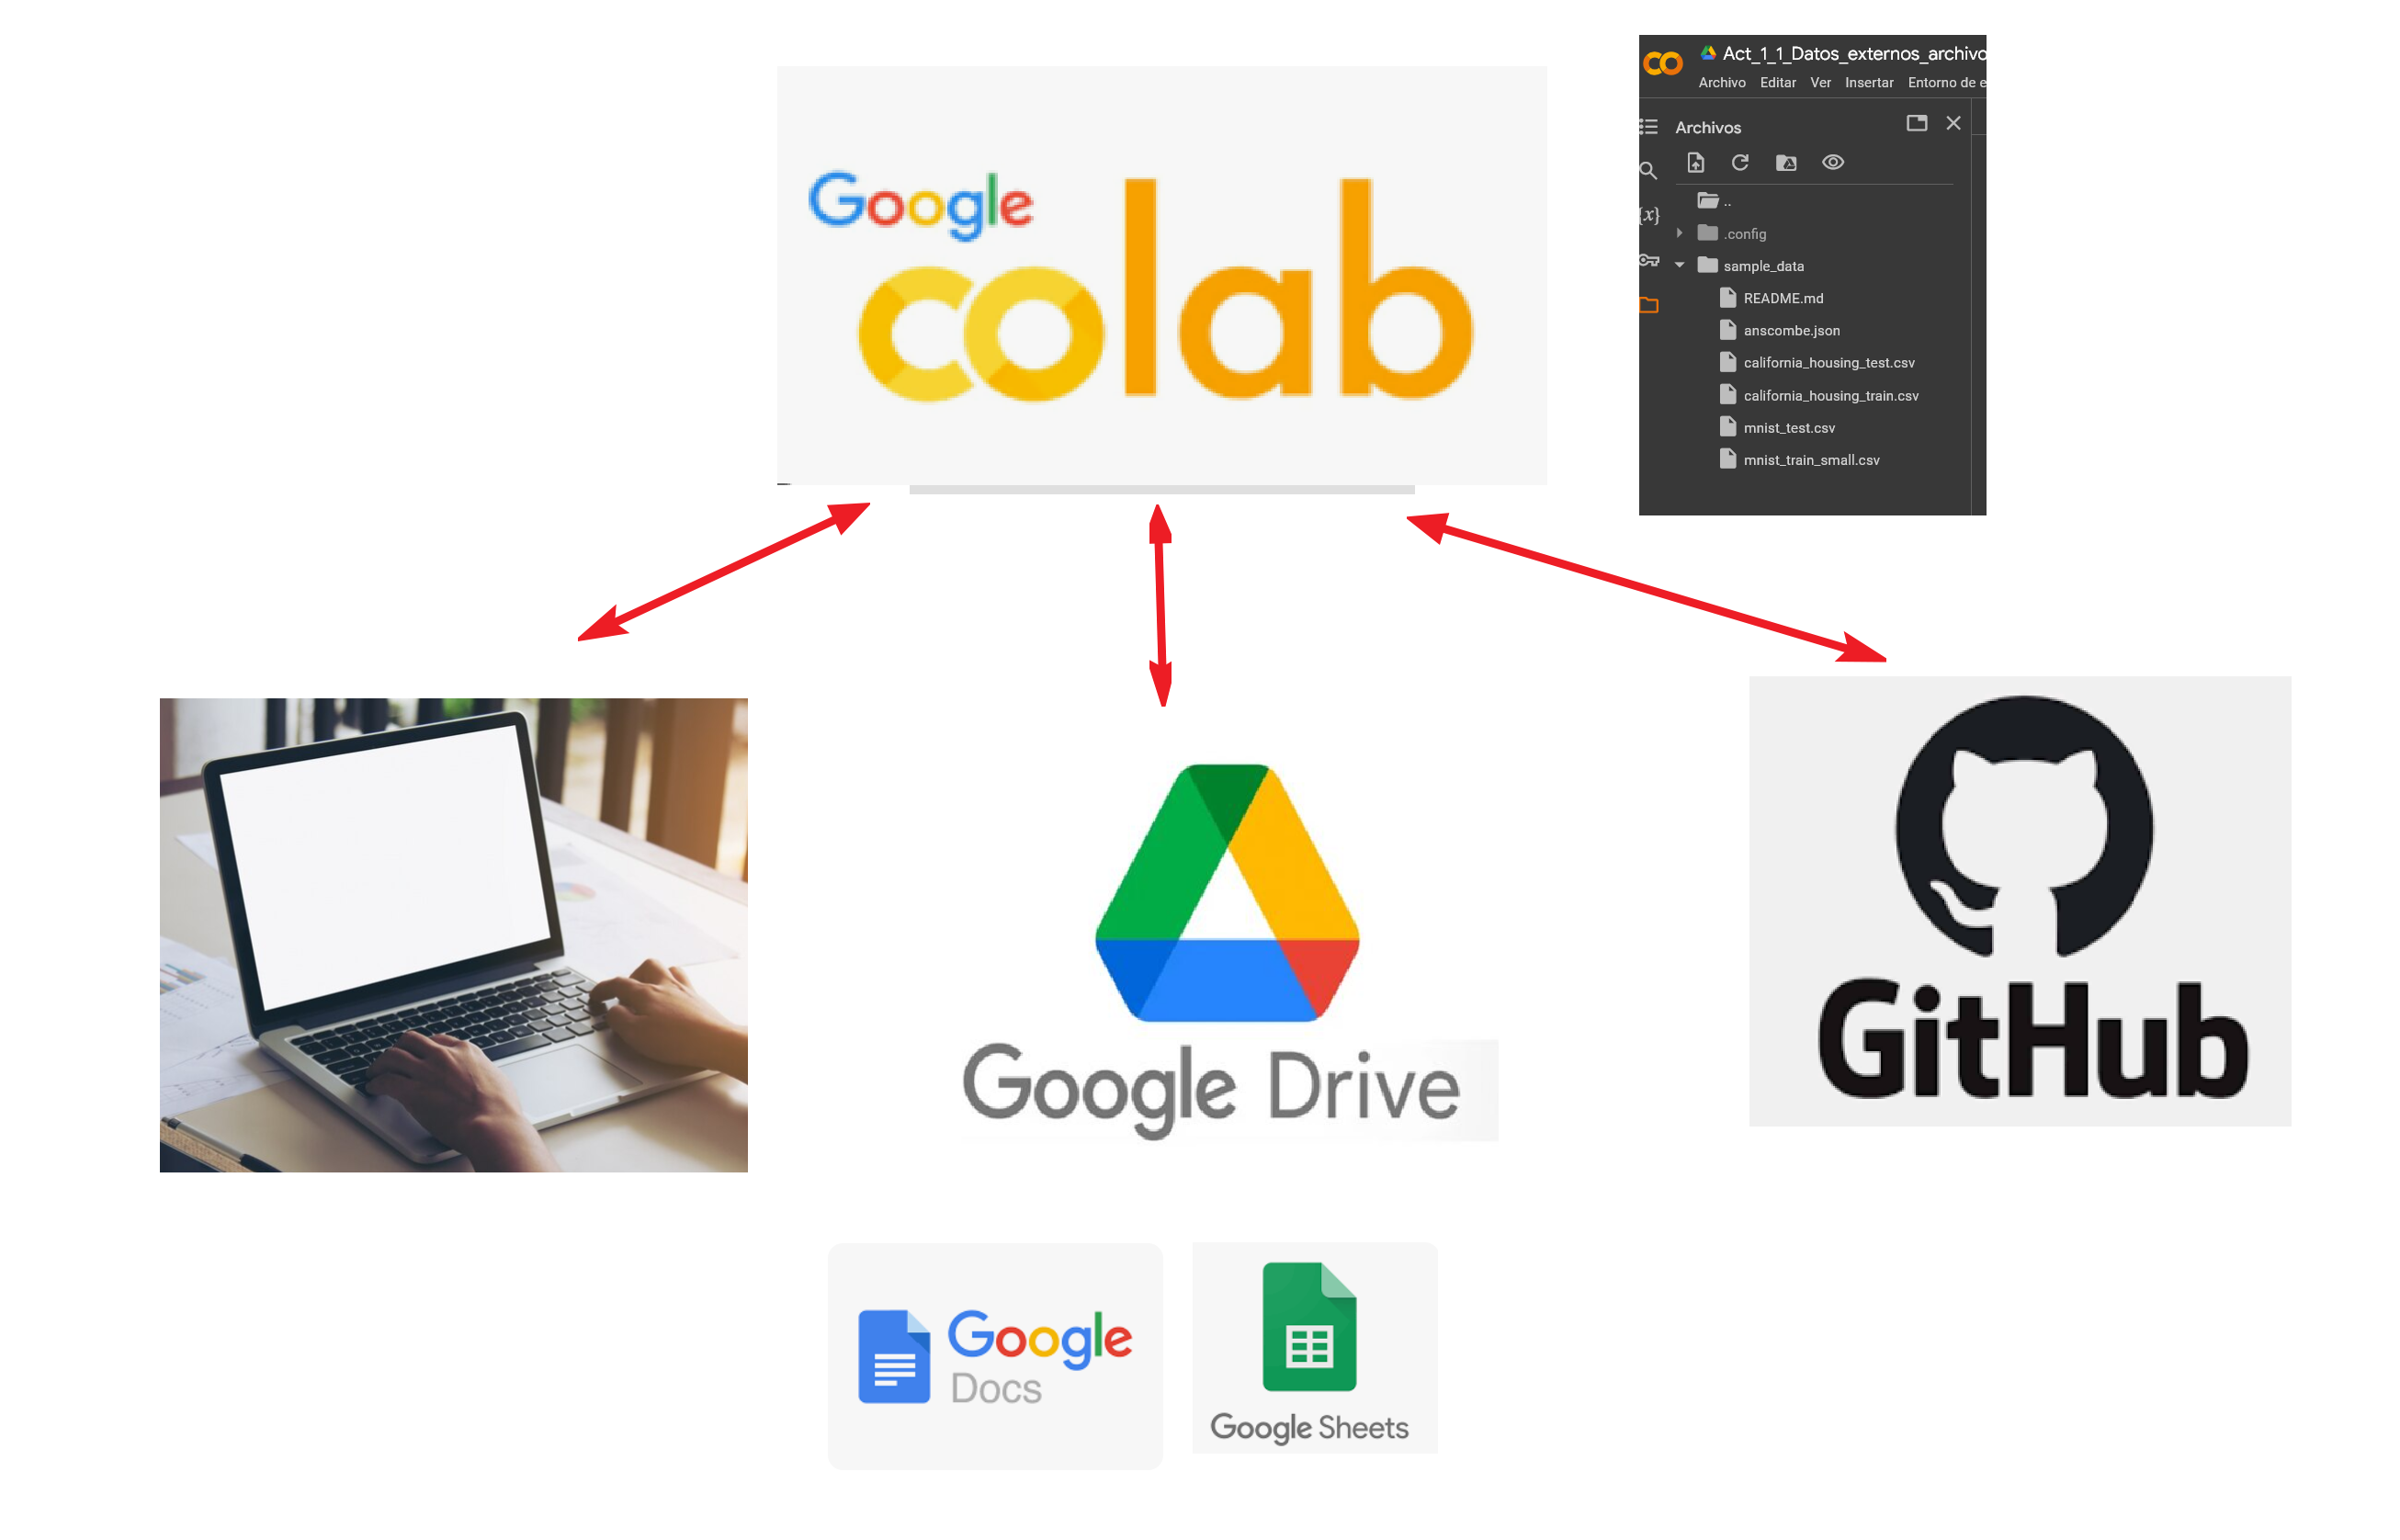

En este cuaderno se ofrecen la siguientes recetas para la creación/subida/descarga de ficheros con diversas librerías:



* Desde el sistema de archivos local de Google Colab
   * Subir/Descargar archivos desde/hacia el sistema de archivos local a Google Colab
   * Descargar archivos en el sistema de archivos local
* Desde Google Drive al entorno de Google Colab
   * Activar(Montar) Google Drive
   * Crear un archivo/directorio en Drive desde Google colab
   * Uso de PyDrive desde Google colab para crear o ver contendos de archvo en Google Drive
* Haciendo uso de API de REST de Drive
   * Desde entorno de Google Colab copia ficheros a Google Drive	y lee su contenido
* Haciendo uso de la librería Google Spread Sheet (gspreed)
   * Crear una hoja de cálculo de Google
   * Acceder al contenido de la hoja de cálculo e insertar datos
   * Descargar datos de una hoja de cálculo en Python como un DataFrame de Pandas
* Descargar datos desde GitHub en un dataframe




De todas formas en la siguiente publicación se ofrecen también unas opciones muy interesantes:

Título: [7 ways to load external data into Google Colab](https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7)

Tener en cuneta que los archivos que se suben durante la ejecución de un notebook, posteriormente se borran al terminar la sesión en la que se han creado.

# **SOLUCIÓN EJERCICIO 1**

In [ ]:
#Ejer 01: Crear en el PC un fichero con un contenido de Loren Ipsum y subirlo

In [ ]:
#SOLUCIÓN EJ 1 Sube el fichero pedido al Colab
from google.colab import files

with open('Lorem.txt', 'w') as f:
  f.write('Lorem ipsum dolor sit amet, consectetur adipiscing elit.')

files.download('Lorem.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **SOLUCIÓN EJERCICIO 2**

In [ ]:
#Ejer 02: Descargar el fichero subido en el apartado anterior (Ejer01)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#SOLUCIÓN EJ 2 Descarga el fichero del apartado anterior
from google.colab import files
files.download('Lorem.txt')



# **SOLUCIÓN EJERCICIO 3**


In [ ]:
#Importante: Se recomienda hacer todos los ejercicios tomando como punto de partida el drirectorio raiz de Drive,
#Ejer 03: Crear en drive un directorio llamado GoogleColab_test_Ejer_24_25 y dentro de ella un fichero con un contenido
#      de Loren Ipsum. Consultar/verificar su creación en Google Drive y en el navegador de Google Colab


In [18]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#SOLUCIÓN EJ 3 Crea un directorio con el nombre pedido en el enunciado
from google.colab import drive
drive.flush_and_unmount
drive.mount('/content/drive', force_remount=True)

!mkdir '/content/drive/My Drive/Colab Notebooks/GoogleColab_test_Ejer_2024_2025'

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/GoogleColab_test_Ejer_2024_2025’: File exists


In [ ]:
#SOLUCIÓN EJ 3 Muestra todas las carpetas del directorio raíz del drive
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

title: M BIU (GUSTAVO), id: 1igJSSnsYYKiH6toiO-q4noB7A1zkdLJa
title: SPS (GUSTAVO), id: 1oCs4YshhzvGRJIlQtcfNCLn51TQK_exz
title: M2D (CARLOS), id: 1GAGD7ythfOuKgaNvUdJr4XZVMMkRaWDk
title: PRO (CARLOS), id: 124vu0Td5znUmrhCIy6TiI1nsX8Fcm21H
title: SNS (SALVADOR), id: 1gnwe0nauaultYcUSjEttGgCtN7jDcFhK
title: Colab Notebooks, id: 12oaA70Ge8ivKxFcXaG6gtyu_5LlOwBWh
title: CIBER, id: 1v2jm7WbdyDRnw3J6gwb7iwsshi0-79o6
title: ! MIERDAS, id: 1fZKqh9ULgTX_3ZgLrf-D2XlAY1ykj5uq
title: 2ºDAM, id: 1XLrmN3Rcy0GVEfFgNFpehj8H6NcgFdwD
title: 1ºDAM, id: 1hjUsGLRNNLnk90VeRkZiMF5s8Ik-mqQy


In [ ]:
#SOLUCIÓN EJ 3
uploaded = drive.CreateFile({'parents': [{"id": '1NdqyvPMvRV7e5TO0p5FQStt-rFDVZS0D'}], 'title': 'LoremEjemplo.txt'})
uploaded.SetContentString('Lorem ipsum dolor sit amet, consectetur adipiscing elit.')
# Lo crea y lo sube en el directorio que hemos consegido buscando su id en el codigo anterior
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1alH3wrqbU2gsXP-e_cATk-4-19yQMhhO


In [ ]:
#SOLUCIÓN EJ 3
file_list = drive.ListFile({'q': "'1NdqyvPMvRV7e5TO0p5FQStt-rFDVZS0D' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

title: ErikSantanaMontelongo.txt, id: 1dMZd46oV8pW8cFvQwoqSzlb3ANY-fVeT
title: LoremEjemplo.txt, id: 1rOSxXwPnX_ODJPmXbhJhhwtTEbYmoSGt


# **SOLUCIÓN EJERCICIO 4**

In [ ]:
#Ejer 04: En la carpeta creada en el ejercicio anterior (GoogleColab_test_Ejer_24_25), crear un fichero cuyo nombre sean tu nombre y apellidos,
# en su contenido incluir un texto LorenIpsum distinto al utilizado en el punto anterior (de 50 palabras y añadir tu nombre al principio)
# y al terminar mostrar su contenido.
# Similar al ejemplo. Validar su existencia consultando Gdrive.ListFile  y el explorador de archivos de GoogleColab en este notebook

# Url's de referencia:
#    https://pythonhosted.org/PyDrive/filemanagement.html
#    https://pythonhosted.org/PyDrive/filelist.html#get-all-files-which-matches-the-query
#    https://stackoverflow.com/questions/56434084/google-pydrive-uploading-a-file-to-specific-folder



In [ ]:
#SOLUCIÓN EJ 4 Crea la carpeta con mi nombre y apellidos
!mkdir '/content/drive/My Drive/Colab Notebooks/GoogleColab_test_Ejer_2024_2025/ErikSantanaMontelongo'

In [ ]:
#SOLUCIÓN EJ 4 Sube el archivo Lorem Ipsum con las caracteristicas pedidas
uploaded = drive.CreateFile({'parents': [{"id": '1isNIwf-dRwQrN-VijROrcJYI1HSPgCbq'}], 'title': 'LoremIpsum2.txt'})
uploaded.SetContentString('Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis varius ullamcorper diam, vitae faucibus mauris viverra at. Donec viverra enim eu aliquam fringilla. Mauris ac eros sed ex convallis molestie. Integer a ante eget elit consectetur iaculis et sed lectus. Nullam maximus sollicitudin ligula, sit amet lobortis metus scelerisque eu..')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1-htTgnNtfCOAKn5EYUITB2jb9kApdfO1


In [ ]:
#SOLUCIÓN EJ 4 Muestra el nombre y la id del archivo que acabamos de subir
file_list = drive.ListFile({'q': "'1isNIwf-dRwQrN-VijROrcJYI1HSPgCbq' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

title: LoremIpsum2.txt, id: 1-htTgnNtfCOAKn5EYUITB2jb9kApdfO1


# **SOLUCIÓN EJERCICIO 5**

In [ ]:
#Ejer 05: Mostrar una lista de los ficheros que existen en el directorio GoogleColab_test_Ejer_24_25
# url de referencia: https://pythonhosted.org/PyDrive/quickstart.html#creating-and-updating-file

# Para mi solución utilicé la siguiente publicación: https://stackoverflow.com/questions/40224559/list-of-file-in-a-folder-drive-api-pydrive


In [ ]:
#SOLUCIÓN EJ 5 Muestra la lista de ficheros del directorio pedido
file_list = drive.ListFile({'q': "'1NdqyvPMvRV7e5TO0p5FQStt-rFDVZS0D' in parents and trashed=false"}).GetList()
for file1 in file_list:
    print('title: %s, id: %s' % (file1['title'], file1['id']))

title: ErikSantanaMontelongo, id: 1isNIwf-dRwQrN-VijROrcJYI1HSPgCbq
title: LoremEjemplo.txt, id: 1rOSxXwPnX_ODJPmXbhJhhwtTEbYmoSGt


# **SOLUCIÓN EJERCICIO 6**

In [ ]:
# Ejer 06: Haciendo uso de la api (ejemplo anterior) descargar/mostrar el contenido del fichero que creaste con contenido LorenIpsum
#       en la carpeta GoogleColab_test_Ejer y con el nombre tuyo.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [ ]:
#SOLUCIÓN EJ 6 Muestra el contenido del fichero
!cat '/content/drive/MyDrive/Colab Notebooks/GoogleColab_test_Ejer_2024_2025/ErikSantanaMontelongo/LoremIpsum2.txt'

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis varius ullamcorper diam, vitae faucibus mauris viverra at. Donec viverra enim eu aliquam fringilla. Mauris ac eros sed ex convallis molestie. Integer a ante eget elit consectetur iaculis et sed lectus. Nullam maximus sollicitudin ligula, sit amet lobortis metus scelerisque eu..

In [ ]:
#SOLUCIÓN EJ 6 Descarga y muestra el contenido del fichero
file_id = '1-htTgnNtfCOAKn5EYUITB2jb9kApdfO1'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: b'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis varius ullamcorper diam, vitae faucibus mauris viverra at. Donec viverra enim eu aliquam fringilla. Mauris ac eros sed ex convallis molestie. Integer a ante eget elit consectetur iaculis et sed lectus. Nullam maximus sollicitudin ligula, sit amet lobortis metus scelerisque eu..'


# **SOLUCIÓN EJERCICIO 7**

In [ ]:
# Ejer 07: Subir a un repositorio de GitHub una hoja de cálculo en formato csv y realizar la importanción a un dataframe,
# utilizando como separador de campos un "punto y coma" ;


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [8]:
#SOLUCIÓN EJ 7 Crea la hoja de calculo
sh = gc.create('hojaCalculoErik')

In [9]:
#SOLUCIÓN EJ 7 Rellena con valores aleatorios
worksheet = gc.open('hojaCalculoErik').sheet1

cell_list = worksheet.range('A1:C2')

import random
for cell in cell_list:
  cell.value = random.randint(1, 10)

worksheet.update_cells(cell_list)

{'spreadsheetId': '1yGY7P1M02rRCFx1P4fRZJJesHmSmWJUqmxj-zbm16M8',
 'updatedRange': "'Hoja 1'!A1:C2",
 'updatedRows': 2,
 'updatedColumns': 3,
 'updatedCells': 6}

In [37]:
#SOLUCIÓN EJ 7 Python como dataframe
worksheet = gc.open('hojaCalculoErik').sheet1

rows = worksheet.get_all_values()
print(rows)

import pandas as pd
df_Example01 = pd.DataFrame.from_records(rows)

[['6', '10', '8'], ['3', '8', '6']]


In [34]:
#SOLUCIÓN EJ 7 Lee el repositorio de github y lo muestra
import pandas as pd

repositorio = 'https://raw.githubusercontent.com/Erikzonnn/PythonSpreadsheet/main/hojaCalculoErik.csv'
hojaCalculoRead = pd.read_csv(repositorio, sep=';', encoding='latin-1')

https://github.com/Erikzonnn/PythonSpreadsheet

In [35]:
#SOLUCIÓN EJ 7 Ejecuta la funcion que muestra el archivo subido en github
hojaCalculoRead

,"6,10,8"
0,"3,8,6"
